## The Description from Udacity
For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from AirBnB available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data.

1. Pick a dataset.

2. Pose at least three questions related to business or real-world applications of how the data could be used.

3. Create a Jupyter Notebook, using any associated packages you'd like, to:
    - Prepare data:
        - Gather necessary data to answer your questions
        - Handle categorical and missing data
        - Provide insight into the methods you chose and why you chose them
    - Analyze, Model, and Visualize
        - Provide a clear connection between your business questions and how the data answers them.
4. Communicate your business insights:

- Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind. 
- Create a blog post to share your questions and insights with a non-technical audience. 

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

## The Description from Kaggle(Data Resource)

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Content
The following Airbnb activity is included in this Seattle dataset:

- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

Inspiration
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

# First Step: Data understanding. Try to define the questions.

In [230]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [557]:
# variable definition
calendar = pd.read_csv("Seattle AirBNB Data/calendar.csv")
listing = pd.read_csv("Seattle AirBNB Data/listings.csv")
reviews = pd.read_csv("Seattle AirBNB Data/reviews.csv")

In [558]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [559]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [560]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# Question 1: What's the relation between position and price?
I'll set the King Street Station as the center. By getting its latitude and longtitude, I can calculate the distance between the airbnb's position and the station.

In [561]:
king_station_position = [47.598330, -122.311640]
latitude = []
longitude = []
distance = []
listing['price'] = (listing['price'].replace('[\$,)]', '', regex=True).replace('[(]', '-', regex=True)).astype(float)

In [562]:
# listing.info()

In [563]:
listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [564]:
# We're using the price column and there's no NaN value. - No need to data cleaning.
# remove outlier, mean +/- 3 std
delete = []
for i in range(len(listing['price'])):
    if listing['price'].iloc[i] > (listing['price'].mean() + 3 * listing['price'].std()) or listing['price'].iloc[i] < (listing['price'].mean() - 3 * listing['price'].std()):
        delete.append(listing['price'].index[i])
listing = listing.drop(delete)

In [565]:
listing['price'].describe()

count    3737.000000
mean      119.405941
std        66.118687
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       395.000000
Name: price, dtype: float64

In [320]:
# the distance between the airbnb's position and the station
for index in range(len(listing)):
    latitude.append(abs(king_station_position[0] - listing['latitude'].iloc[index]))
    longitude.append(abs(king_station_position[1] - listing['longitude'].iloc[index]))
             
# sqrt(latitude^2 + longtitude ^ 2) = linear distance
for index in range(len(latitude)):
    distance.append(math.sqrt(latitude[index] ** 2 + longtitude[index] ** 2))
    

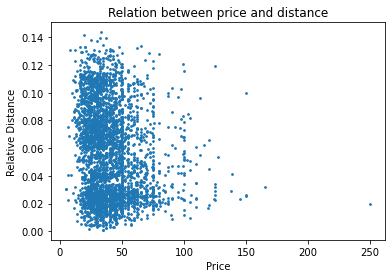

In [324]:
# visualizing
# price / accomodates means price per person
plt.scatter((listing['price'] / listing['accommodates']), distance, s=3)
plt.xlabel("Price")
plt.ylabel("Relative Distance")
plt.title("Relation between price and distance");

As you can see, the y axis is relative distance. It was calculated by latitude and longitude. 
We got a conclusion, that is, the distance and the price don't have positive correlation. It go against our intuition. The closer doesn't mean more expensive.

# Q2: What about the relationship between  the amounts of review and price? Are they positive correlation?

In [295]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [327]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [566]:
# the amount of review, sorting by listing_id. Type is series
amount_of_reviews = reviews.listing_id.value_counts().sort_index()
amount_of_reviews.head()

4291     35
5682    297
6606     52
7369     40
9419     79
Name: listing_id, dtype: int64

In [353]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46


In [370]:
# sort the 'listing' by id, reset its index and drop the initial index
listing = listing.sort_values('id').reset_index(drop=True)
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,NaN,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...",...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,Pike/Pine is the most urban neighborhood in se...,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [396]:
# Convert 'amount_of_reviews' to dataframe for merging, and reset its index
# After reseting its index, renaming its columns name
amt_reviews_df = amount_of_reviews.to_frame().reset_index()
amt_reviews_df = amt_reviews_df.rename(columns={'index': 'id', 'listing_id': 'review_amounts'})
amt_reviews_df.head()

,id,review_amounts
0,4291,35
1,5682,297
2,6606,52
3,7369,40
4,9419,79


In [400]:
# merge 'amt_reviews_df' and 'listing' on 'id'
# For some airbnb without reviews, use left method.
listing = listing.merge(amt_reviews_df, on='id', how='left')
listing.loc[:, ['id', 'accommodates', 'price', 'review_amounts']]

,id,accommodates,price,review_amounts
0,3335,4,120.0,NaN
1,4291,2,82.0,35.0
2,5682,2,48.0,297.0
3,6606,2,90.0,52.0
4,7369,2,85.0,40.0
...,...,...,...,...
3608,10332096,2,40.0,NaN
3609,10334184,2,120.0,NaN
3610,10339144,2,60.0,NaN
3611,10339145,5,219.0,NaN


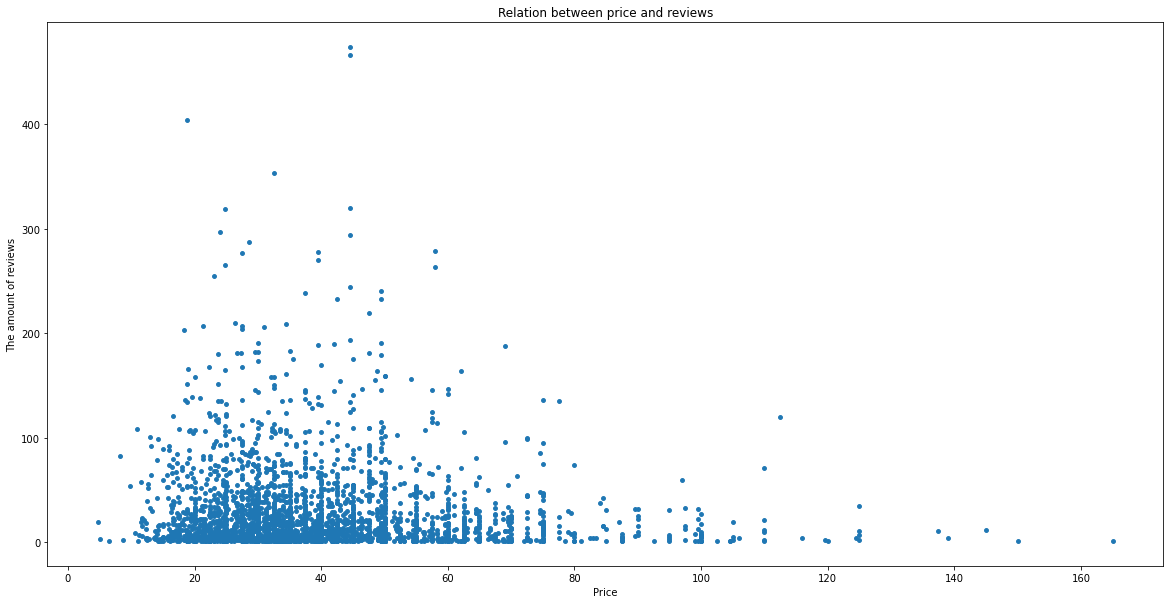

In [409]:
# visualizing
# price / accmmodates means price per person(Am I right? I'm not sure.)
plt.figure(figsize=(20, 10))
plt.scatter(x=(listing['price'] / listing['accommodates']), 
            y=listing['review_amounts'], 
            s=15)
plt.xlabel("Price")
plt.ylabel("The amount of reviews")
plt.title("Relation between price and reviews");

As we can see, the lower price they have, possibly the larger amount of reviews they have. They do have relation but not linear relation. I guess I miss some potential variable between these variables.
Because the review doesn't mean the outlier, I don't remove any data.

# Q3: Does it have busy season? If have, is it more expensive than usual?


In [438]:
# import package
import numpy as np
import pandas as pd
import matplotlib as mlt
from sklearn.preprocessing import LabelEncoder

In [540]:
# reload the file to refresh the record
calendar = pd.read_csv("Seattle AirBNB Data/calendar.csv")

In [541]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [542]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


For analyzing the busy season, I'm about to do the following:
1. convert the 'available' columns' t/f to 0/1
2. calculate the total of a day of availability by adding all airbnbs' data
3. visualizing it

In [543]:
# convert the 'available' columns' t/f to 0/1
available_mapping = {'t': 0, 'f': 1}
calendar['available'] = calendar['available'].map(available_mapping)

calendar

,listing_id,date,available,price
0,241032,2016-01-04,0,$85.00
1,241032,2016-01-05,0,$85.00
2,241032,2016-01-06,1,NaN
3,241032,2016-01-07,1,NaN
4,241032,2016-01-08,1,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,1,NaN
1393566,10208623,2016-12-30,1,NaN
1393567,10208623,2016-12-31,1,NaN
1393568,10208623,2017-01-01,1,NaN


In [544]:
calendar['date'] = pd.to_datetime(calendar['date'])
availability = calendar.set_index('date').groupby(pd.Grouper(freq='d')).mean()
availability = availability.reset_index()
availability

,date,listing_id,available
0,2016-01-04,5.550111e+06,0.545574
1,2016-01-05,5.550111e+06,0.511001
2,2016-01-06,5.550111e+06,0.521739
3,2016-01-07,5.550111e+06,0.534835
4,2016-01-08,5.550111e+06,0.533263
...,...,...,...
360,2016-12-29,5.550111e+06,0.257465
361,2016-12-30,5.550111e+06,0.256155
362,2016-12-31,5.550111e+06,0.251179
363,2017-01-01,5.550111e+06,0.234678


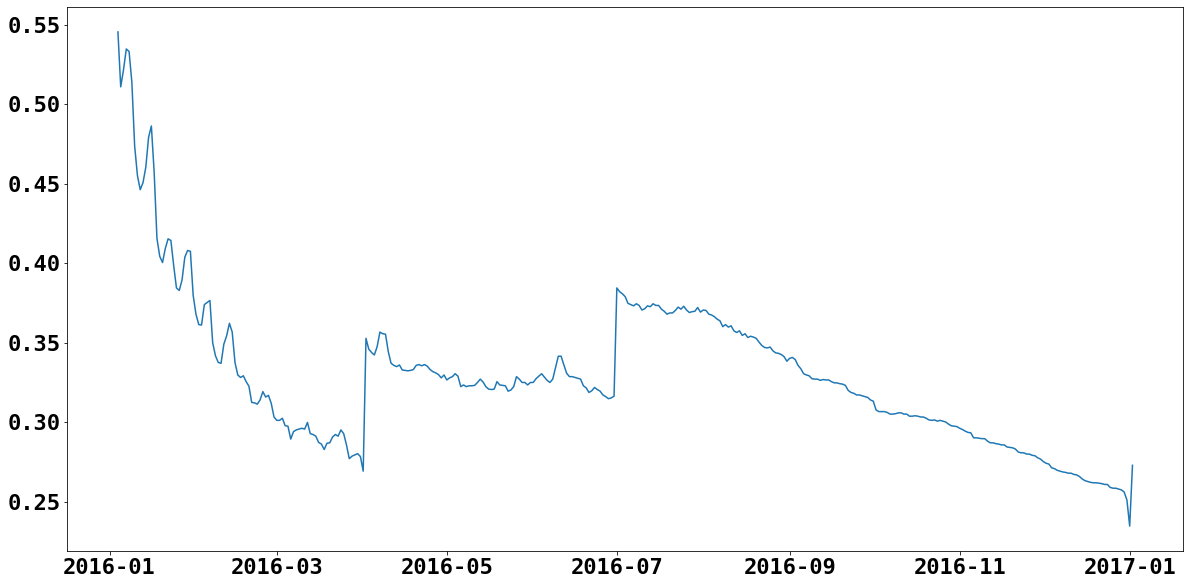

In [545]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
mlt.rc('font', **font)

plt.figure(figsize=(20, 10))
plt.plot(availibility['date'], availibility['available'])

plt.show()

As we can observe, January and July are busy season. Now we're trying to analyze the monthly price.

In [546]:
# here we're going to convert the price to integer
calendar.price = calendar.price.fillna('$0.00')
calendar.price = calendar['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
calendar.price

0          85.0
1          85.0
2           0.0
3           0.0
4           0.0
           ... 
1393565     0.0
1393566     0.0
1393567     0.0
1393568     0.0
1393569     0.0
Name: price, Length: 1393570, dtype: float64

In [554]:
price_avg = calendar.set_index('date').groupby(pd.Grouper(freq='d')).sum()
price_avg = price_avg.reset_index()
price_avg

,date,index,listing_id,available,price
0,2016-01-04,2659628345,21190325396,2083,211819.0
1,2016-01-05,2659632163,21190325396,1951,225312.0
2,2016-01-06,2659635981,21190325396,1992,220815.0
3,2016-01-07,2659639799,21190325396,2042,214823.0
4,2016-01-08,2659643617,21190325396,2036,227456.0
...,...,...,...,...,...
360,2016-12-29,2661002825,21190325396,983,391359.0
361,2016-12-30,2661006643,21190325396,978,411057.0
362,2016-12-31,2661010461,21190325396,959,416551.0
363,2017-01-01,2661014279,21190325396,896,403607.0


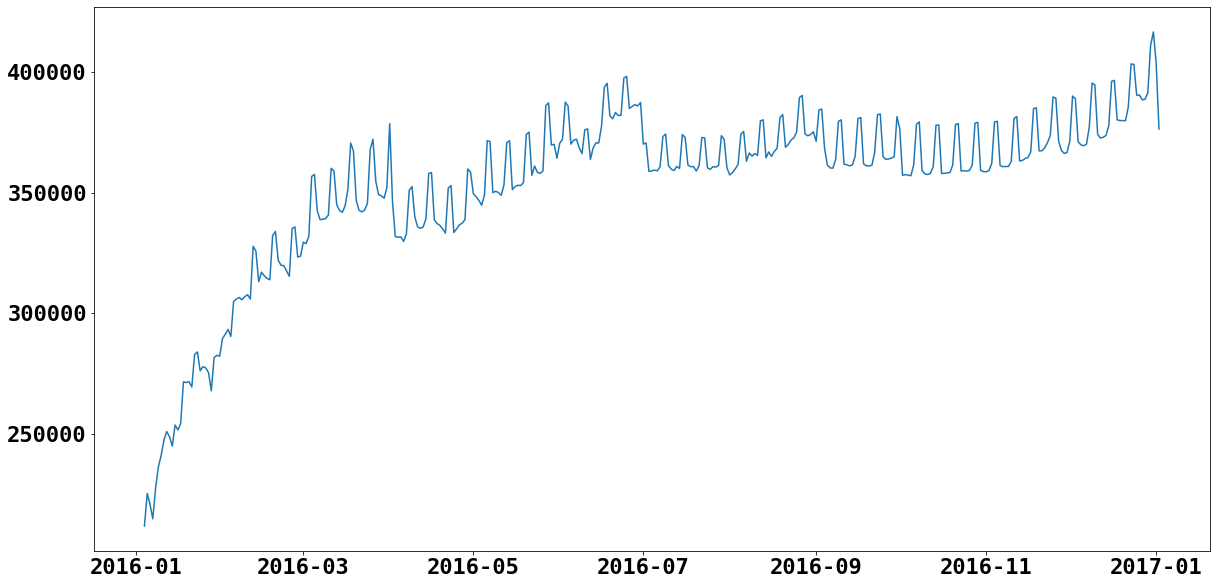

In [555]:
plt.figure(figsize=(20, 10))
plt.plot(price_avg['date'], price_avg['price'])

plt.show()

(I'm not sure my analysis is right or wrong)
As we can see, January haas the lowest price. It can explain why the January is the busy season.